In [64]:
import os.path
# from tools.distribution import plot_distribution, plot_freq_sub
from tools.load_data import get_list, process
from scipy.stats import gaussian_kde
from tools.utils import get_root_path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols

In [10]:
cat = ['all','film-animation', 'autos-vehicles', 'music', 'pets-animals', 'sports', 'travel-events', 'gaming',
'people-blogs', 'comedy', 'entertainment', 'news-politics', 'howto-style', 'education', 'science-technology', 'shows', 'nonprofits-activism']

In [34]:
# save regression and correlation data in dataframe
# categories = []
freq_m_corr = []
freq_m_coefs = []
freq_m_pvals = []
avg_view_coefs = []
avg_view_corr = []
avg_view_pvals = []
avg_freqs = []
root_dir = get_root_path()
for cls in cat:
    # Corrected to join paths and format string with cls
    data_dir = os.path.join(root_dir, f'data/{cls}1000.csv')
    cat_df = pd.read_csv(data_dir)
    cat_df = cat_df[['freq_m', 'video views', 'video count', 'subscribers']]
    # print(f'{cls} has {cat_df.isna().sum()} Nan values')
    cat_df = cat_df.replace([np.inf, -np.inf], np.nan)  # Replace Inf/-Inf with NaN
    cat_df = cat_df.dropna()


    # Calculate average_view
    cat_df['average_view'] = cat_df['video views'] / cat_df['video count']
    cat_df = cat_df.replace([np.inf, -np.inf], np.nan)  # Replace Inf/-Inf with NaN
    cat_df = cat_df.dropna()
    avg = cat_df['freq_m'].mean()
    globals()[f'{cls}_df'] = cat_df

    formula = 'subscribers ~ freq_m + average_view'
    model = ols(formula, data=cat_df).fit()

    freq_m_coef = model.params['freq_m']
    avg_view_coef = model.params['average_view']
    freq_m_pval = model.pvalues['freq_m']
    avg_view_pval = model.pvalues['average_view']

    corr_freq = cat_df['freq_m'].corr(cat_df['subscribers'])
    corr_avgview = cat_df['average_view'].corr(cat_df['subscribers'])

    # Append results to lists
    freq_m_corr.append(corr_freq)
    freq_m_coefs.append(freq_m_coef)
    freq_m_pvals.append(freq_m_pval)
    avg_view_corr.append(corr_avgview)
    avg_view_coefs.append(avg_view_coef)
    avg_view_pvals.append(avg_view_pval)
    avg_freqs.append(avg)
cat_data = {
    'Category': cat,
    'Frequency Correlation': freq_m_corr,
    'Frequency Coefficient': freq_m_coefs,
    'Frequency P-value': freq_m_pvals,
    'Average View Correlation': avg_view_corr,
    'Average View Coefficient': avg_view_coefs,
    'Average View P-value': avg_view_pvals,
    'avg_freqs': avg_freqs
}

# Convert the dictionary to a pandas DataFrame
corr_df = pd.DataFrame(cat_data)
corr_df[['Frequency Correlation', 'Frequency Coefficient',
       'Frequency P-value', 'Average View Correlation',
       'Average View Coefficient', 'Average View P-value', 'avg_freqs']] = corr_df[['Frequency Correlation', 'Frequency Coefficient',
       'Frequency P-value', 'Average View Correlation',
       'Average View Coefficient', 'Average View P-value', 'avg_freqs']].apply(lambda x: round(x, 3))

In [75]:

root_dir = get_root_path()
cat = 'gaming'
data_dir = os.path.join(root_dir, f'data/{cat}1000.csv')
df = pd.read_csv(data_dir)
df['average_view'] = df['video views']/df['video count']

In [82]:
a = [df['freq_m'], df['average_view'], np.log(df['freq_m']), np.log(df['average_view'])]
b = [df['subscribers'], np.log(df['subscribers'])]
for j in b:
    print('sub')
    for i in a:
        print(i.corr(j))

sub
0.0766389727704139
0.08366878872714131
0.07898742746136538
0.3828970376661734
sub
0.09036755783173339
0.0909451667378122
0.09399534184136639
0.44494212943017514


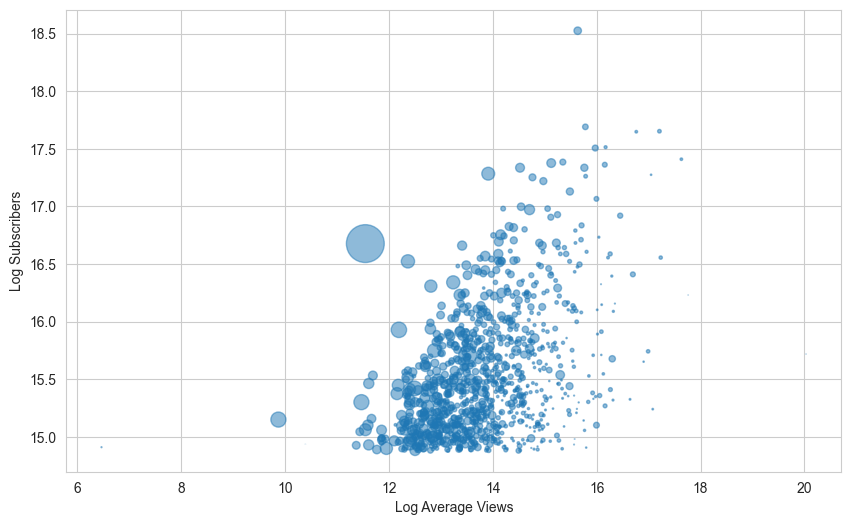

In [22]:
# subscribers, frequency, average views
plt.figure(figsize=(10, 6))
scatter = plt.scatter(np.log(df['average_view']), np.log(df['subscribers']), s=df['freq_m'], alpha=0.5)  # Multiplying freq_m to adjust bubble size

# Adding titles and labels
# plt.title('Log-log Plot of Average Views vs. Subscribers')
plt.xlabel('Log Average Views')
plt.ylabel('Log Subscribers')
# plt.colorbar(scatter, label='Frequency per Month (Size of Bubble)')

# Show plot
plt.show()

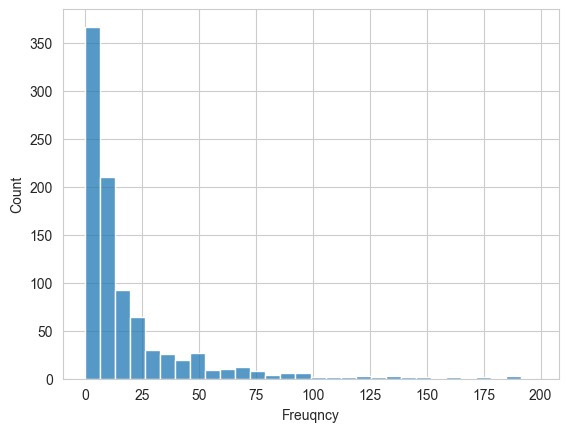

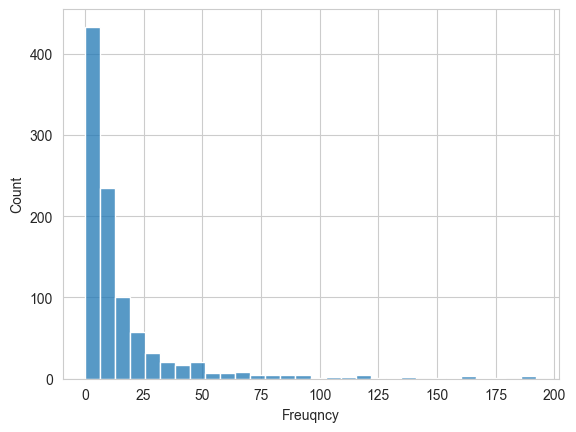

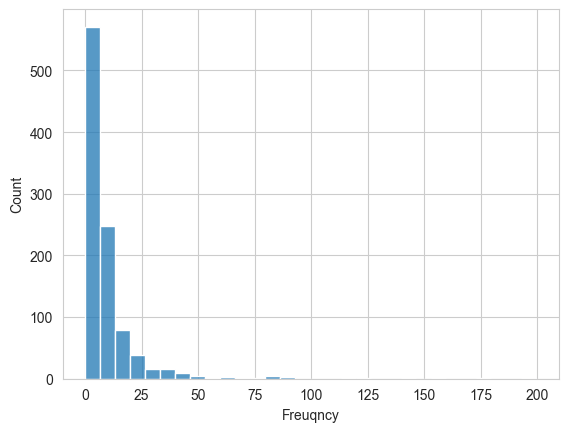

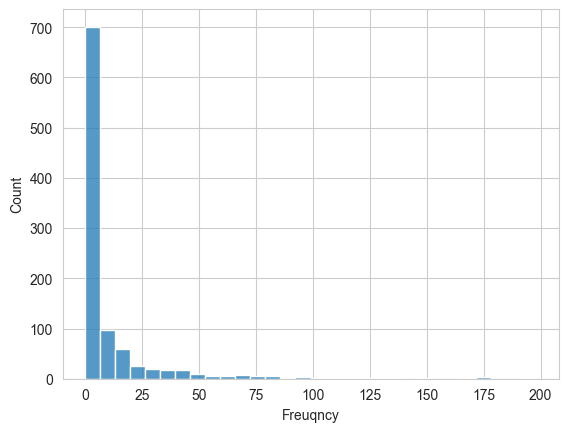

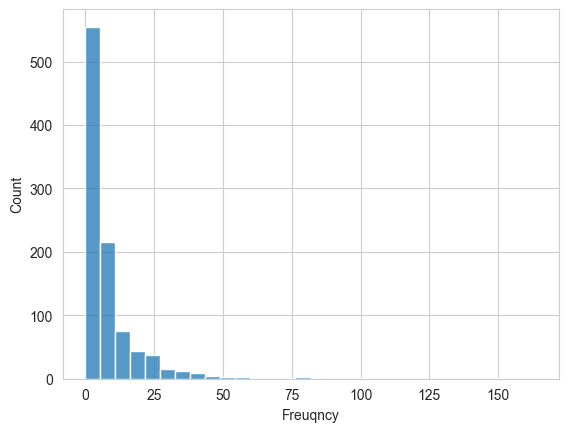

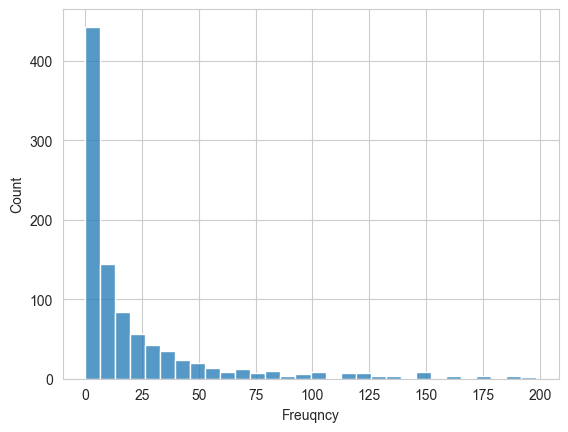

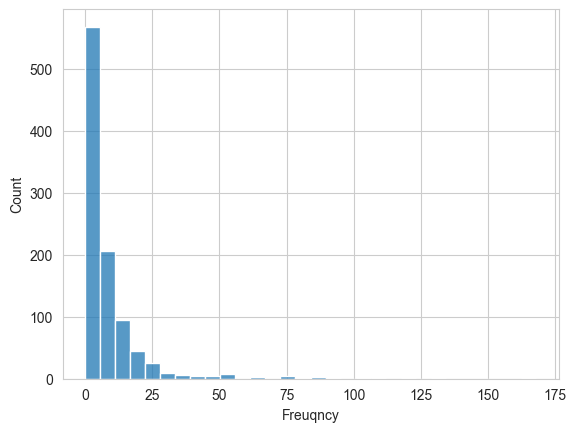

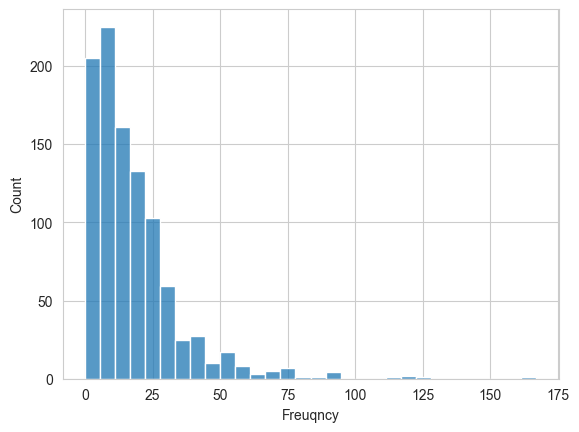

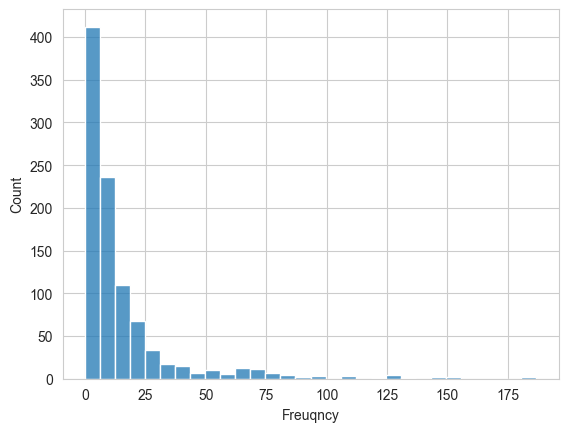

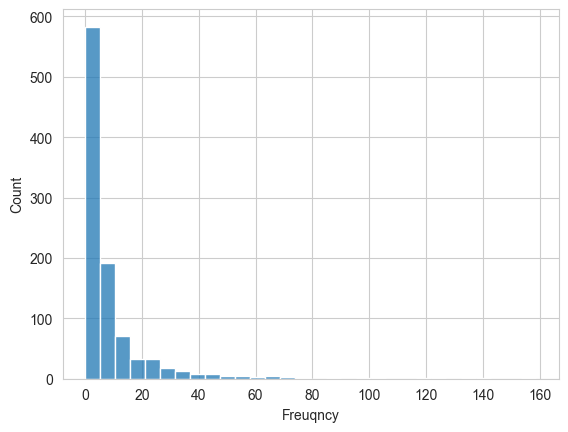

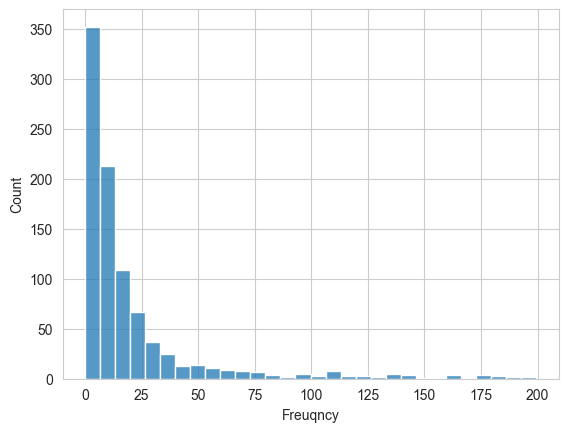

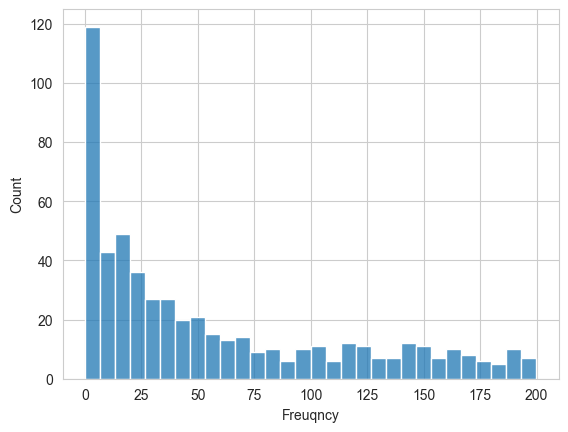

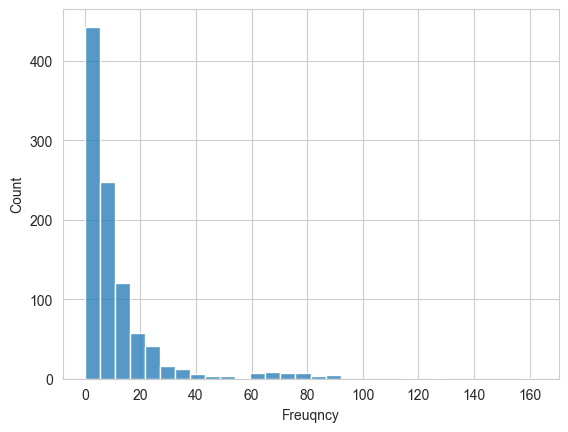

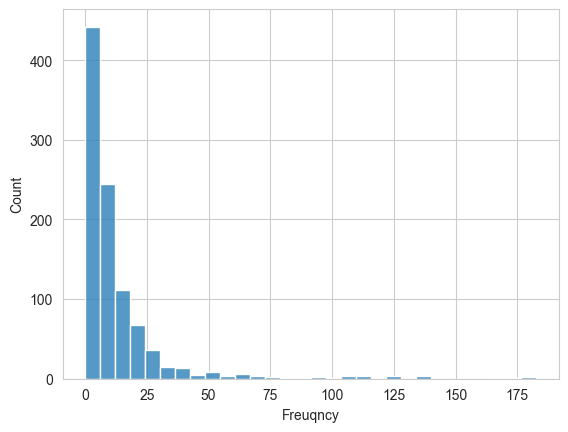

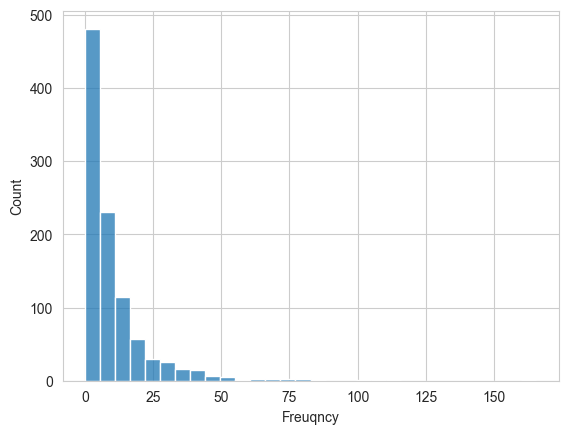

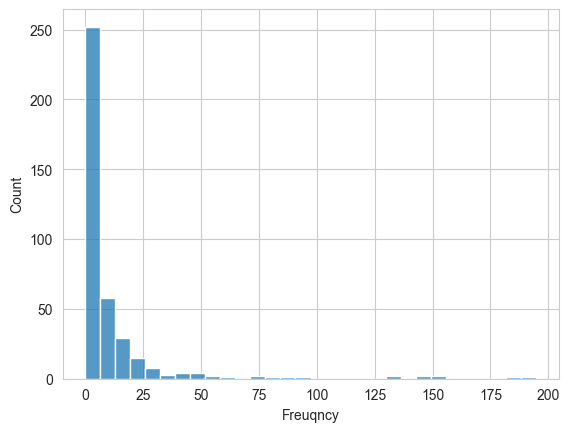

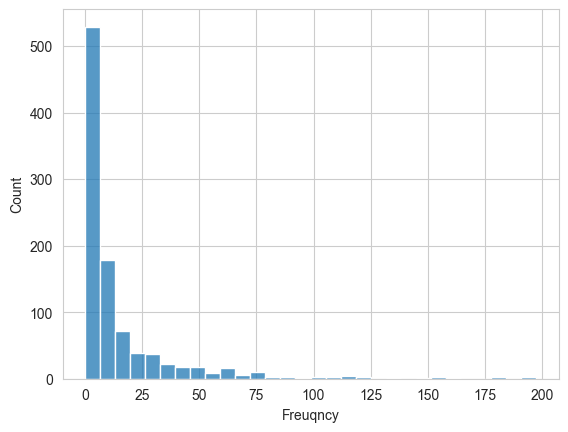

In [70]:
# distribution of real date
cat = ['all','film-animation', 'autos-vehicles', 'music', 'pets-animals', 'sports', 'travel-events', 'gaming',
'people-blogs', 'comedy', 'entertainment', 'news-politics', 'howto-style', 'education', 'science-technology', 'shows', 'nonprofits-activism']
for cls in cat:
    data_dir = os.path.join(root_dir, f'data/{cls}1000.csv')
    df = pd.read_csv(data_dir)
    df['average_view'] = df['video views']/df['video count']
    df_filtered = df[(df.freq_m < 200) & (df.freq_m >0)]
    sns.histplot(df_filtered['freq_m'], bins=30)
    # Optional: Add labels and title
    plt.xlabel('Freuqncy')
    plt.ylabel('Count')
    # plt.title('Distribution of Frequency')
    # plt.savefig(os.path.join(root_dir, f'plots/freq_distribution_{cls}200.png'))

    # Show the plot
    plt.show()

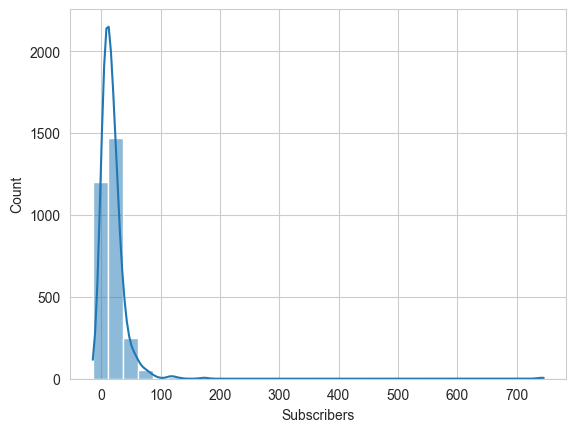

In [61]:
# plot resampled frequency data
fre = np.load('/Users/gee/PycharmProjects/Fairness-for-SMI/simu_process/freq_simu_gaming.npy')
# fre = fre[fre>0]
sns.histplot(fre, bins=30, kde=True)
# Optional: Add labels and title
plt.xlabel('Subscribers')
plt.ylabel('Count')
# plt.title('Distribution of Frequency')

# Show the plot
plt.show()

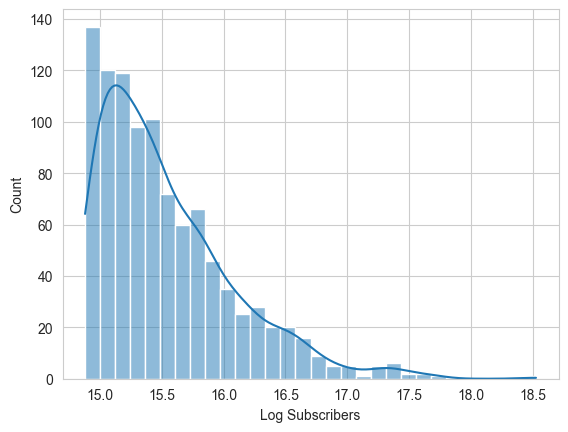

In [47]:
# distribution of real date
df_filtered = df #[(df.freq_m < 200) & (df.freq_m >0)]
sns.histplot(np.log(df_filtered['subscribers']), bins=30)
# Optional: Add labels and title
plt.xlabel('Log Subscribers')
plt.ylabel('Count')
# plt.title('Distribution of Frequency')

# Show the plot
plt.show()

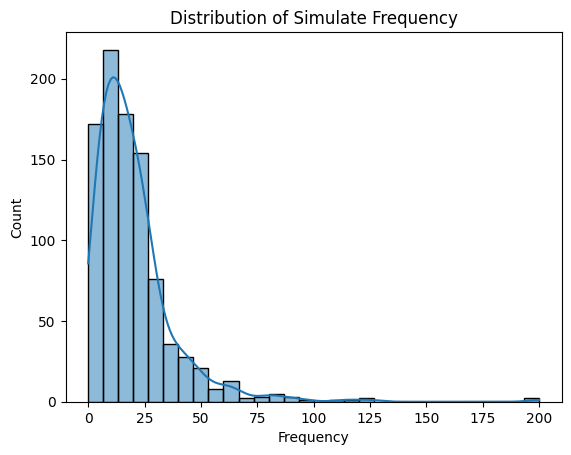

In [61]:
max_value = 200

raw_freq = df['freq_m']
kde = gaussian_kde(raw_freq, bw_method=0.2)
new_freq = kde.resample(size=1000)[0]
min_value = 0

new_freq = np.clip(new_freq, min_value, max_value)
non_zero_freq = new_freq[new_freq != 0]

sns.histplot(non_zero_freq,bins=30, kde=True)
# Optional: Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Distribution of Simulate Frequency')

# Show the plot
plt.show()

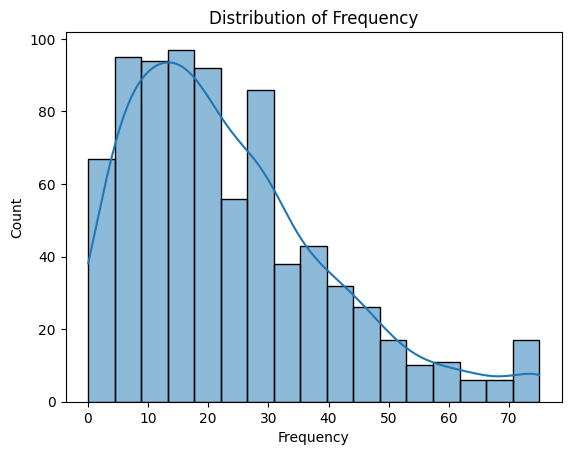

0.1